# Atividade Regressão Linear

Daniel Pontes Nery
GU3008347

In [1]:
# pip install pandas matplotlib numpy sklearn seaborn mlxtend

## Importações

In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import heatmap

## Carregamento

In [4]:
# Carregando o Dataset
iris_dataset = sns.load_dataset("iris")
iris_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualização

c:\Users\danie\projects\scripts\linkedin_message_automation\venv\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


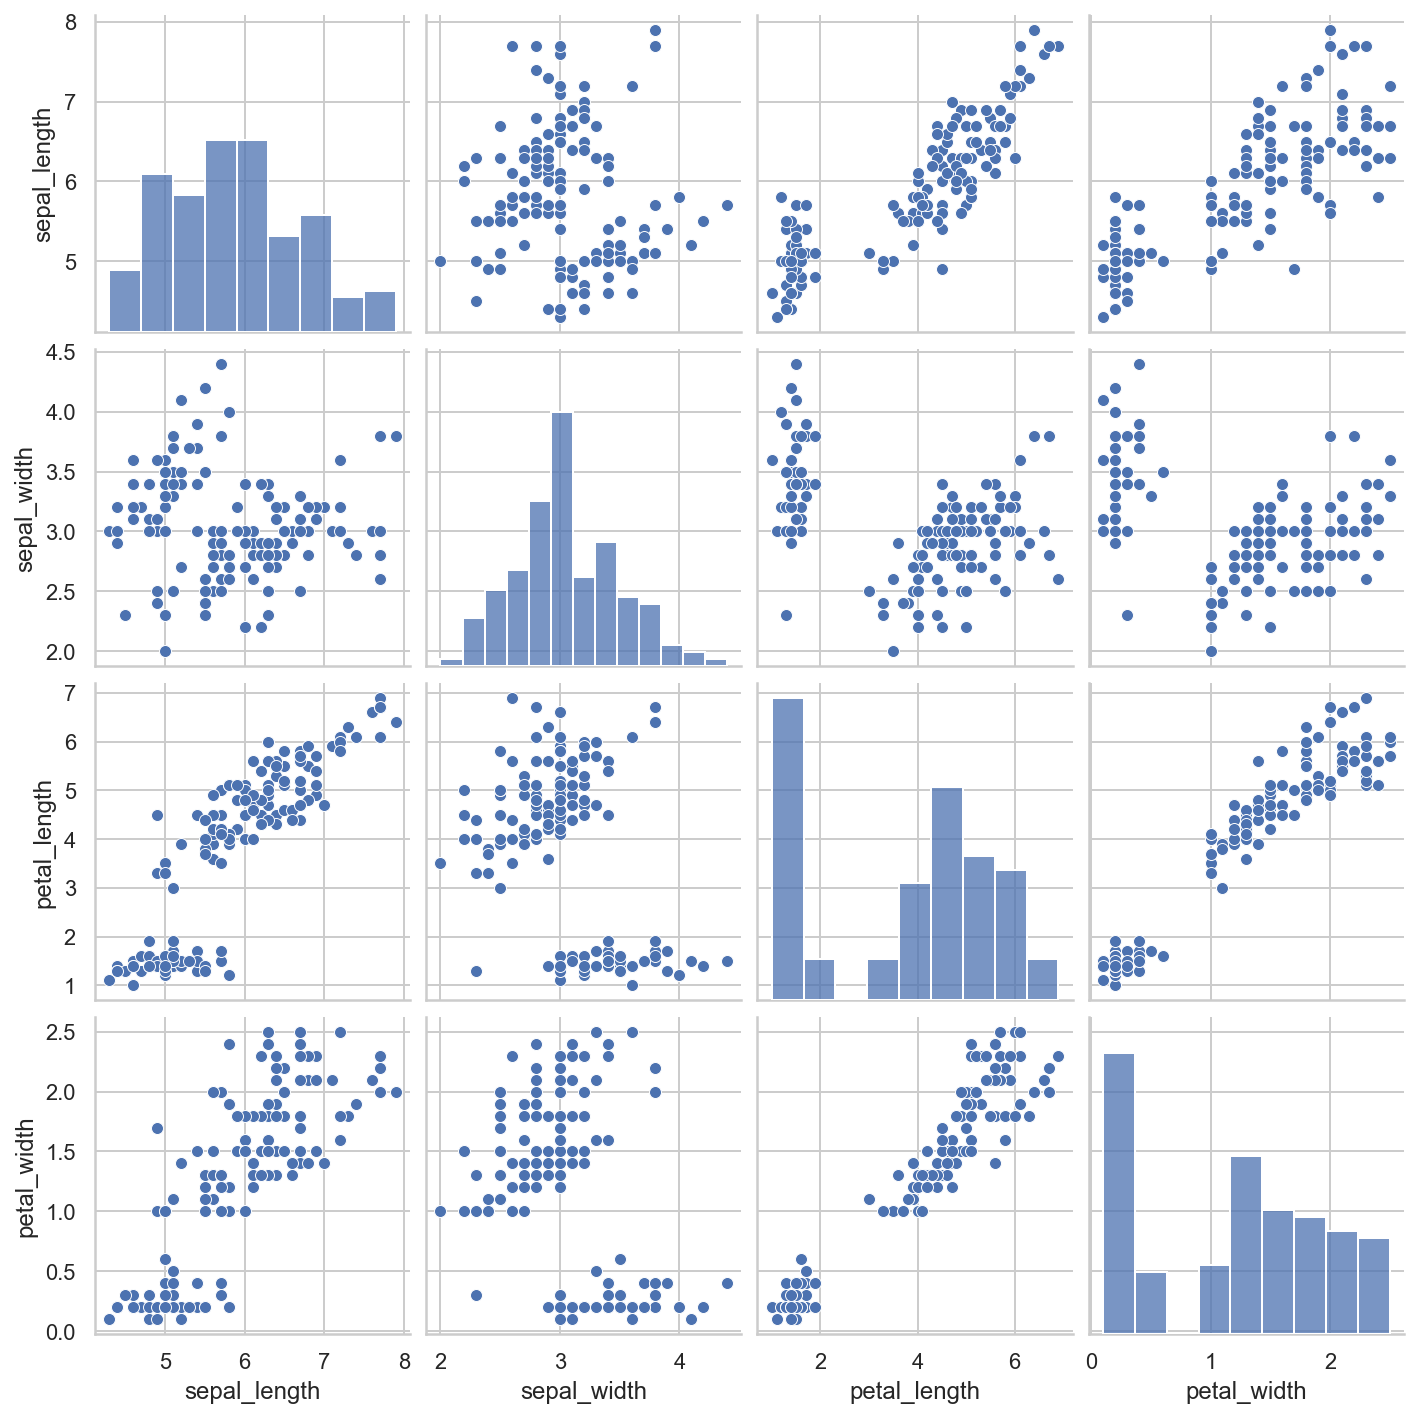

In [5]:
# Plotando gráficos para ver as relações dos campos e ver com quais é possível realizar a regressão
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style='whitegrid', context='notebook')
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
sns.pairplot(iris_dataset, size=2.5)
plt.savefig('scatter.png', dpi=300)
plt.show()

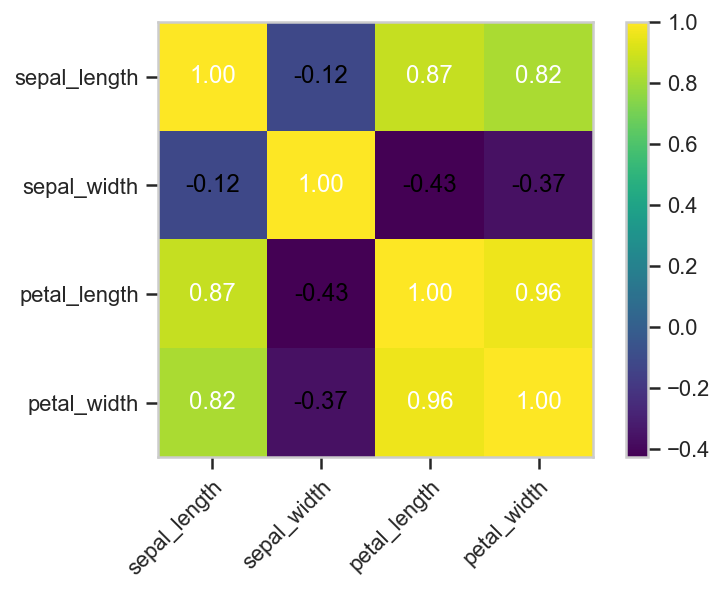

In [6]:
# Matriz de correlação então os campos
cm = np.corrcoef(iris_dataset.filter(cols).values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)
plt.show()

## Expressão Regular

In [7]:
# Classe de regressão linear criada  
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
    
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

In [13]:
def tratar_dados(dataset):
    dados_array = dataset.to_numpy()

    novos_registros = []
    for record in dados_array:
        new_recod = record[0:4]
        novos_registros.append(novos_registros)

    return novos_registros


In [126]:
# Pegando os dados de X e Y
X = iris_dataset.filter(['sepal_length']).values
y = iris_dataset.filter(['petal_length']).values
nx, ny = iris_dataset.filter(['petal_length']).values.shape
y = iris_dataset.filter( ['petal_length']  ).values.reshape((nx*ny))

In [127]:
# Chamando classe de regressão linear do sklearn 
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()

In [128]:
# Chamando classe de regressão linear criada 
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

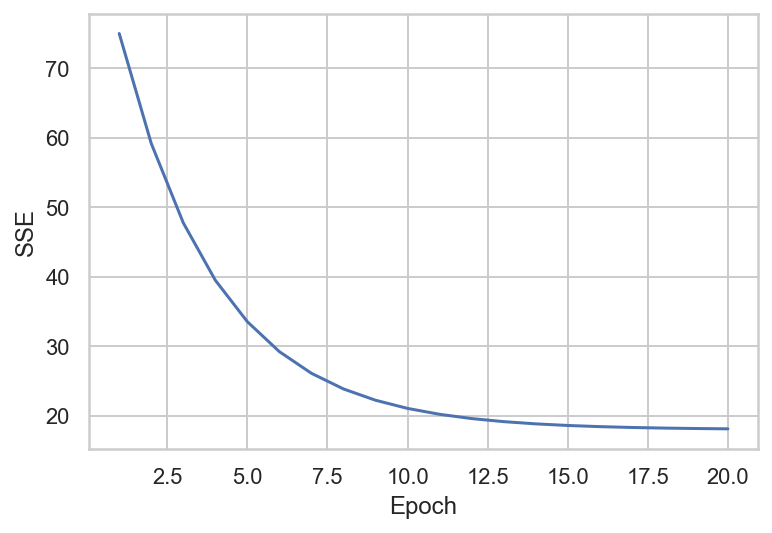

In [129]:
# O que é isso?
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
#plt.tight_layout()
#plt.savefig('images/10_05.png', dpi=300)
plt.show()

In [130]:
# Função para plotar a regressão linear
def lin_regplot(x, y, model):
    plt.scatter(x, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(x, model.predict(x), color='black', lw=2)
    return

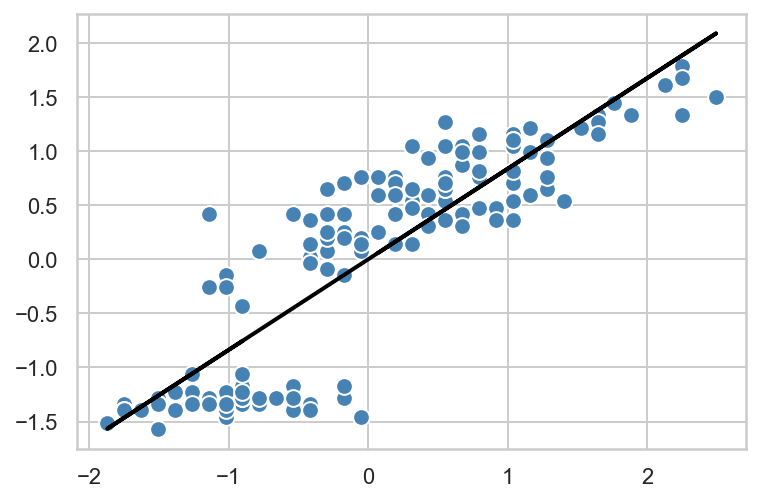

In [133]:
lin_regplot(X_std, y_std, lr)
plt.show()

In [134]:
# O que é esses dois?
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.838
Intercept: 0.000


In [135]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 1.858
Intercept: -7.101


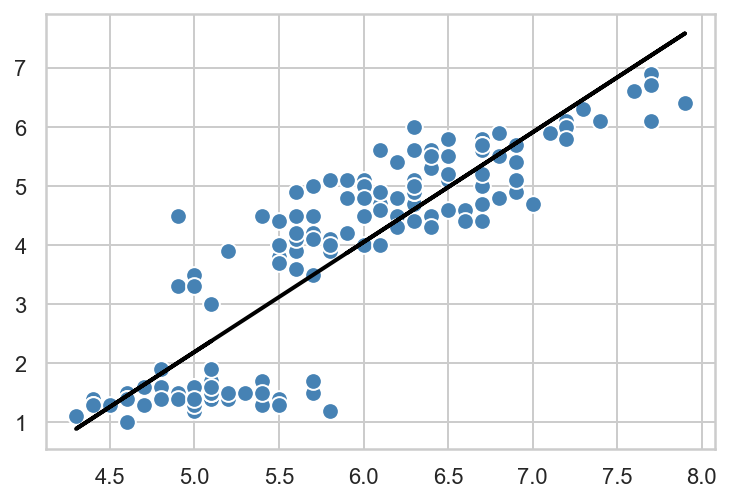

In [137]:
lin_regplot(X, y, slr)
#plt.savefig('images/10_07.png', dpi=300)
plt.show()